In [267]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [268]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02

X = torch.arange(start, end , step)
y = weight * X + bias

In [269]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =  X[train_split:], y[train_split:]



In [270]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label = "Testing data")


    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

    plt.legend(prop={"size":14})


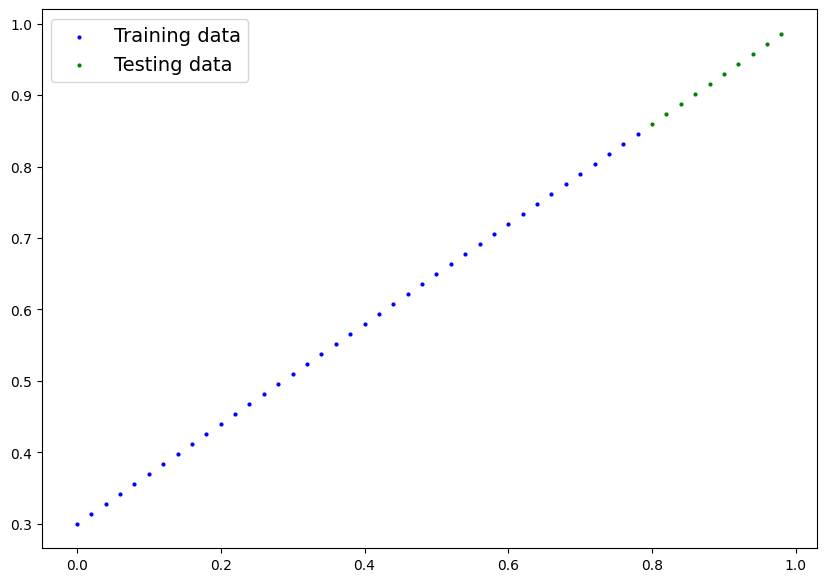

In [271]:
plot_predictions()

In [272]:
class LineaRegression(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype= torch.float))
        
    def forward(self, x:torch.Tensor)-> torch.tensor:
            return self.weights * x + self.bias

In [273]:
torch.manual_seed(42)
model_0 = LineaRegression()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [274]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [275]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values =[]
test_loss_values =[]
for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_preds = model_0(X_train)
    
    # Calculate the loss
    loss = loss_fn(y_preds, y_train)
    
    # Optimize the zero grad
    optimizer.zero_grad()
    #
    # Perform backpropagation
    loss.backward()
    
    # Step the optimizer
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_preds = model_0(X_test)

        # Calculate the loss
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch) 
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f' Epoch: {epoch} -- Loss: {loss} -- Test loss: {test_loss}')
        print(model_0.state_dict())



 Epoch: 0 -- Loss: 0.31288138031959534 -- Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
 Epoch: 10 -- Loss: 0.1976713240146637 -- Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
 Epoch: 20 -- Loss: 0.08908725529909134 -- Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
 Epoch: 30 -- Loss: 0.053148526698350906 -- Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
 Epoch: 40 -- Loss: 0.04543796554207802 -- Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
 Epoch: 50 -- Loss: 0.04167863354086876 -- Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
 Epoch: 60 -- Loss: 0.03818932920694351 -- Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

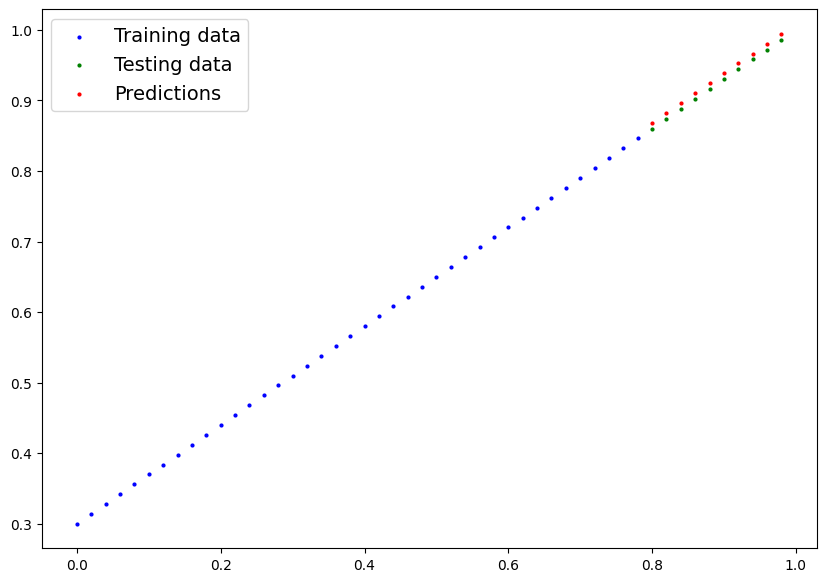

In [276]:
# Plot the prediction
plot_predictions(predictions= test_preds)

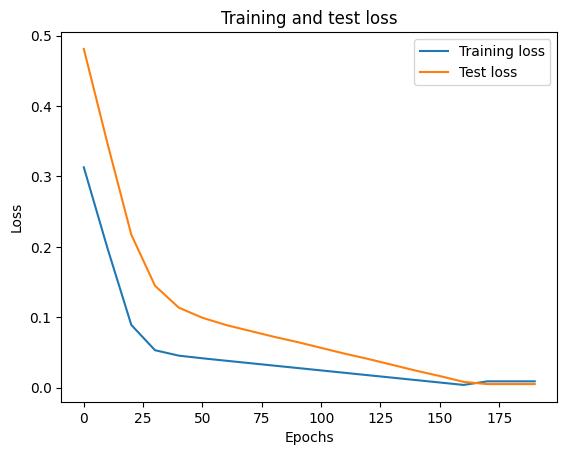

In [278]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) , label = 'Training loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [280]:
# Saving our pytorch model
from pathlib import Path

#Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) 

#Model save path
MODEL_NAME = 'linearregression_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


torch.save(obj= model_0.state_dict(),
           f= MODEL_SAVE_PATH)

In [284]:
# Load a model

loaded_model_0 =LineaRegression()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [287]:
class LineaRegressionV2(nn.Module):
    def __init__(self ):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)


    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    

#set the manual seed
torch.manual_seed(42)
model_1 = LineaRegressionV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [291]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.01)

In [ ]:
epochs =200

epoch_count = []
loss_values =[]
test_loss_values =[]


for epoch in range(epochs):
    model_1.train()

    y_pred =model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():

        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
       
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f' Epoch: {epoch} -- Loss: {loss} -- Test loss: {test_loss}')
        print(model_0.state_dict())